In [ ]:
%%time
# !head -n 20 bluetooth_graph_analysis.py
!awk 'FNR>=28 && FNR<=50' bluetooth_graph_analysis.py
%run bluetooth_graph_analysis.py
%matplotlib inline

from speclib import misc, plotting, loaders, graph  # noqa
PRINT = False


@jit()
def compareDfUsers(baseuser, peers, df):
    # Compute the similarity in the way they answered the questions
    dct = dict()
    for i in range(len(peers)):
        dct[(baseuser, peers[i])] = simfnc(df.loc[baseuser], df.loc[peers[i]])
    sim = pd.Series(dct).sort_values(ascending=False)
    return sim


dfa = pd.read_msgpack('/lscr_paper/allan/allan_data/participants_graph_adjacency.msgpack')
mask = dfa.sum() != 0
dfa = dfa.loc[mask, mask]  # drop zero-columns
dfa.head()
qdf = pd.read_json('/lscr_paper/allan/allan_data/RGender_.json')
q = misc.QuestionCompleter(qdf)
f = misc.QuestionFilterer(qdf)
ua = loaders.Useralias()



/lscr_paper/allan/scripts/morequestions/bluetooth_graph_analysis.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qdf = qdf[alcohol_questions.notnull().any(axis=1)]


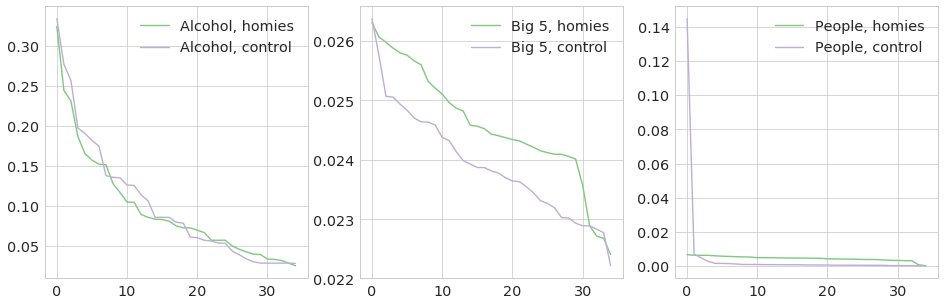

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.plot(sim_alcohol_homies.values, label="Alcohol, homies")
ax1.plot(sim_alcohol_control.values, label="Alcohol, control")
ax1.legend(loc='best')
ax2.plot(sim_big5_homies.values, label="Big 5, homies")
ax2.plot(sim_big5_control.values, label="Big 5, control")
ax2.legend(loc='best')
ax3.plot(sim_people_homies.values, label="People, homies")
ax3.plot(sim_people_control.values, label="People, control")
ax3.legend(loc='best')


In [21]:
print("sim_alcohol_homies", sim_alcohol_homies.values.shape, sep=':  ')
print("sim_alcohol_control", sim_alcohol_control.values.shape, sep=':  ')
print("sim_big5_homies", sim_big5_homies.values.shape, sep=':  ')
print("sim_big5_control", sim_big5_control.values.shape, sep=':  ')
print("sim_people_homies", sim_people_homies.values.shape, sep=':  ')
print("sim_people_control", sim_people_control.values.shape, sep=':  ') 

sim_alcohol_homies:  (35,)
sim_alcohol_control:  (35,)
sim_big5_homies:  (35,)
sim_big5_control:  (35,)
sim_people_homies:  (35,)
sim_people_control:  (35,)


In [20]:
dct['u0001'][0] 

u0001                                                    \
                   u0013     u0018     u0023     u0030     u0049     u0120   
alcohol_homies  0.015123  0.016722  0.021739  0.024155  0.077470  0.027950   
big5_homies     0.027089  0.027565  0.027045  0.023430  0.024745  0.024259   
people_homies   0.006310  0.008418  0.011625  0.007906  0.007456  0.007149   

                                                          ...               \
                   u0152     u0159     u0169     u0265    ...        u0803   
alcohol_homies  0.031250  0.082609  0.023018  0.018116    ...     0.042161   
big5_homies     0.028864  0.023674  0.025407  0.025956    ...     0.023347   
people_homies   0.011350  0.005308  0.011092  0.009282    ...     0.006376   

                                                                            \
                   u0806     u0845     u0865     u0866     u0970     u0998   
alcohol_homies  0.021739  0.043478  0.130435  0.019849  0.040046  0.084738   
big5_homies     0.024733  0.027200  0.025239  0.023941  0.027250  0.027597   
people_homies   0.012002  0.007138  0.005331  0.006785  0.008203  0.005833   

                                              
                   u1012     u1025     u1030  
alcohol_homies  0.064578  0.045516  0.044928  
big5_homies     0.027027  0.028708  0.025597  
people_homies   0.007932  0.006552  0.009293  

[3 rows x 35 columns]